In [1]:
# import libraries
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
no_of_points = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

a = [A[0] + np.random.randn(no_of_points)*blur , A[1] + np.random.randn(no_of_points)*blur ]
b = [B[0] + np.random.randn(no_of_points)*blur , B[
1] + np.random.randn(no_of_points)*blur ]

labels_np = np.vstack((np.zeros((no_of_points,1)),np.ones((no_of_points,1))))

data_np = np.hstack((a,b)).T

data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

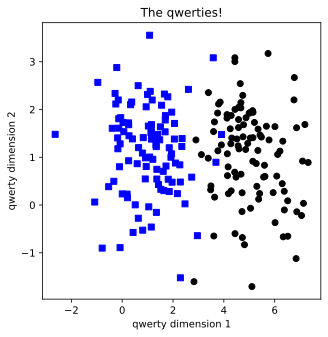

In [3]:
# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [11]:
AnnClassify = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid(),
)

In [12]:
learningRate = 0.01

lossFunction = nn.BCELoss()

optimizer = torch.optim.SGD(AnnClassify.parameters(),lr=learningRate)

In [13]:
num_epochs = 1000
losses = torch.zeros(num_epochs)

for epoch_i in range(num_epochs):

    yHat = AnnClassify(data)

    loss = lossFunction(yHat,labels)
    losses[epoch_i] = loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

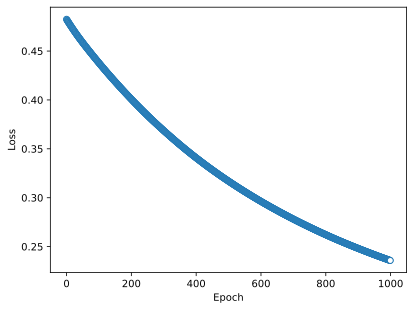

In [14]:
# show the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [15]:
# compute the predictions

# manually compute losses
# final forward pass
predictions = AnnClassify(data)

predlabels = predictions>.5

# find errors
misclassified = np.where(predlabels != labels)[0]

# total accuracy
totalacc = 100-100*len(misclassified)/(2*no_of_points)

print('Final accuracy: %g%%' %totalacc)


Final accuracy: 95.5%


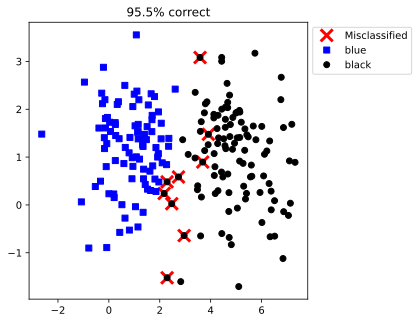

In [16]:
# plot the labeled data
fig = plt.figure(figsize=(5,5))
plt.plot(data[misclassified,0] ,data[misclassified,1],'rx',markersize=12,markeredgewidth=3)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0] ,data[np.where(predlabels)[0],1] ,'ko')

plt.legend(['Misclassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% correct')
plt.show()